## Grid Search Sensitivity Analysis

Based on an exhausive monte carlo and parameter sweep run previously performed ([run log](https://github.com/BlockScience/reflexer/blob/experiment-analysis/experiments/system_model_v3/experiment_monte_carlo/experiment_run_log.md) and the [experiment code](https://github.com/BlockScience/reflexer/blob/experiment-analysis/experiments/system_model_v3/experiment_monte_carlo.py)), postprocessed in the [KPI Notebook](https://github.com/BlockScience/reflexer/blob/experiment-analysis/notebooks/analysis/experiment_notebooks/KPI%20Analysis.ipynb), we will analyze the results and perform sensitivity analysis to illustrate how to examine complex simulation results. 


To obtain the df_sensitivity.pickle file used in this notebook, download it [from the shared Google Drive](https://drive.google.com/drive/u/1/folders/14pJWIQytibnfZM32YaeemW5FVqj4PpE5)

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk

%matplotlib inline

# Simulation Analysis

In [4]:
# load data
df_sensitivity = pd.read_pickle('saved_results/df_sensitivity.pickle')
df_sensitivity.head()

,index,timedelta,cumulative_time,timestamp,eth_price,liquidity_demand,liquidity_demand_mean,eth_collateral,eth_locked,eth_freed,...,control_period,liquidity_demand_shock,arbitrageur_considers_liquidation_ratio,rescale_target_price,target_price_scaled,kpi_stability,kpi_volatility,kpi_liquidity,volatility_ratio_simulation,volatility_ratio_window
0,0,0,0,2017-01-01 00:00:00,294.069151,1.000000,1.000000,154827.528922,154827.528922,0.000000,...,3600.0,True,True,True,4.553,False,True,False,0.068042,0.000199
1,1,3600,3600,2017-01-01 01:00:00,291.208252,906.674484,453.837242,154827.528922,154827.528922,0.000000,...,3600.0,True,True,True,3.140,False,True,False,0.068042,0.000199
2,2,3600,7200,2017-01-01 02:00:00,292.287792,-326.024615,63.906314,107503.536596,154827.528922,47323.992326,...,3600.0,True,True,True,3.140,False,True,False,0.068042,0.000199
3,3,3600,10800,2017-01-01 03:00:00,289.343698,209.658450,136.782382,107503.536596,154827.528922,47323.992326,...,3600.0,True,True,True,3.140,False,True,False,0.068042,0.000199
4,4,3600,14400,2017-01-01 04:00:00,286.827771,-79.844839,28.468771,107503.536596,154827.528922,47323.992326,...,3600.0,True,True,True,3.140,False,True,False,0.068042,0.000199


In [5]:
df_sensitivity.columns

Index(['index', 'timedelta', 'cumulative_time', 'timestamp', 'eth_price',
       'liquidity_demand', 'liquidity_demand_mean', 'eth_collateral',
       'eth_locked', 'eth_freed', 'principal_debt', 'rai_drawn', 'rai_wiped',
       'system_revenue', 'stability_fee', 'market_price', 'market_price_twap',
       'target_price', 'target_rate', 'eth_return', 'eth_gross_return',
       'expected_market_price', 'expected_debt_price', 'error_star',
       'error_star_integral', 'market_slippage', 'RAI_balance', 'ETH_balance',
       'UNI_supply', 'simulation', 'subset', 'run', 'substep', 'timestep',
       'eth_collateral_value', 'collateralization_ratio', 'ki', 'kp',
       'liquidation_ratio', 'controller_enabled', 'control_period',
       'liquidity_demand_shock', 'arbitrageur_considers_liquidation_ratio',
       'rescale_target_price', 'target_price_scaled', 'kpi_stability',
       'kpi_volatility', 'kpi_liquidity', 'volatility_ratio_simulation',
       'volatility_ratio_window'],
      dtype

In [65]:
df_sensitivity.substep.unique()

array([ 0, 18])

In [66]:
df_sensitivity.subset.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [6]:
# install cadCAD Machine Search
# cadCAD tools for preparing & analyzing experiments where large-scale machine search for selecting parameters are involved.
!pip install cadcad_machine_search

### Sensitivity Analysis via Machine Search

With Machine Search, we look at the sensitivity of a KPI towards a set of control parameters.

To do so, we fit a decision tree and a random forest classifier to summarize the monte carlo run results. We use the random forest classifier to get feature importance, and the decision tree classifer to visualize the feature importance. We then plot this information to show the KPI's sensativity towards the control parameters.

In [58]:
from cadcad_machine_search.visualizations import kpi_sensitivity_plot

# Plots the sensitivity of a result dataset towards a KPI.

# Set control parameters for sensitivity analysis
control_params = [
    'ki',
    'kp',
    'control_period',
]

goals = {
    'low_volatility'  : lambda metrics: metrics['kpi_volatility'].mean(),
    'high_stability'  : lambda metrics: metrics['kpi_stability'].mean(),
    'liquidity_threshold': lambda metrics: metrics['kpi_liquidity'].mean(),
}



#### Controller enabled KPI Sensitivity 

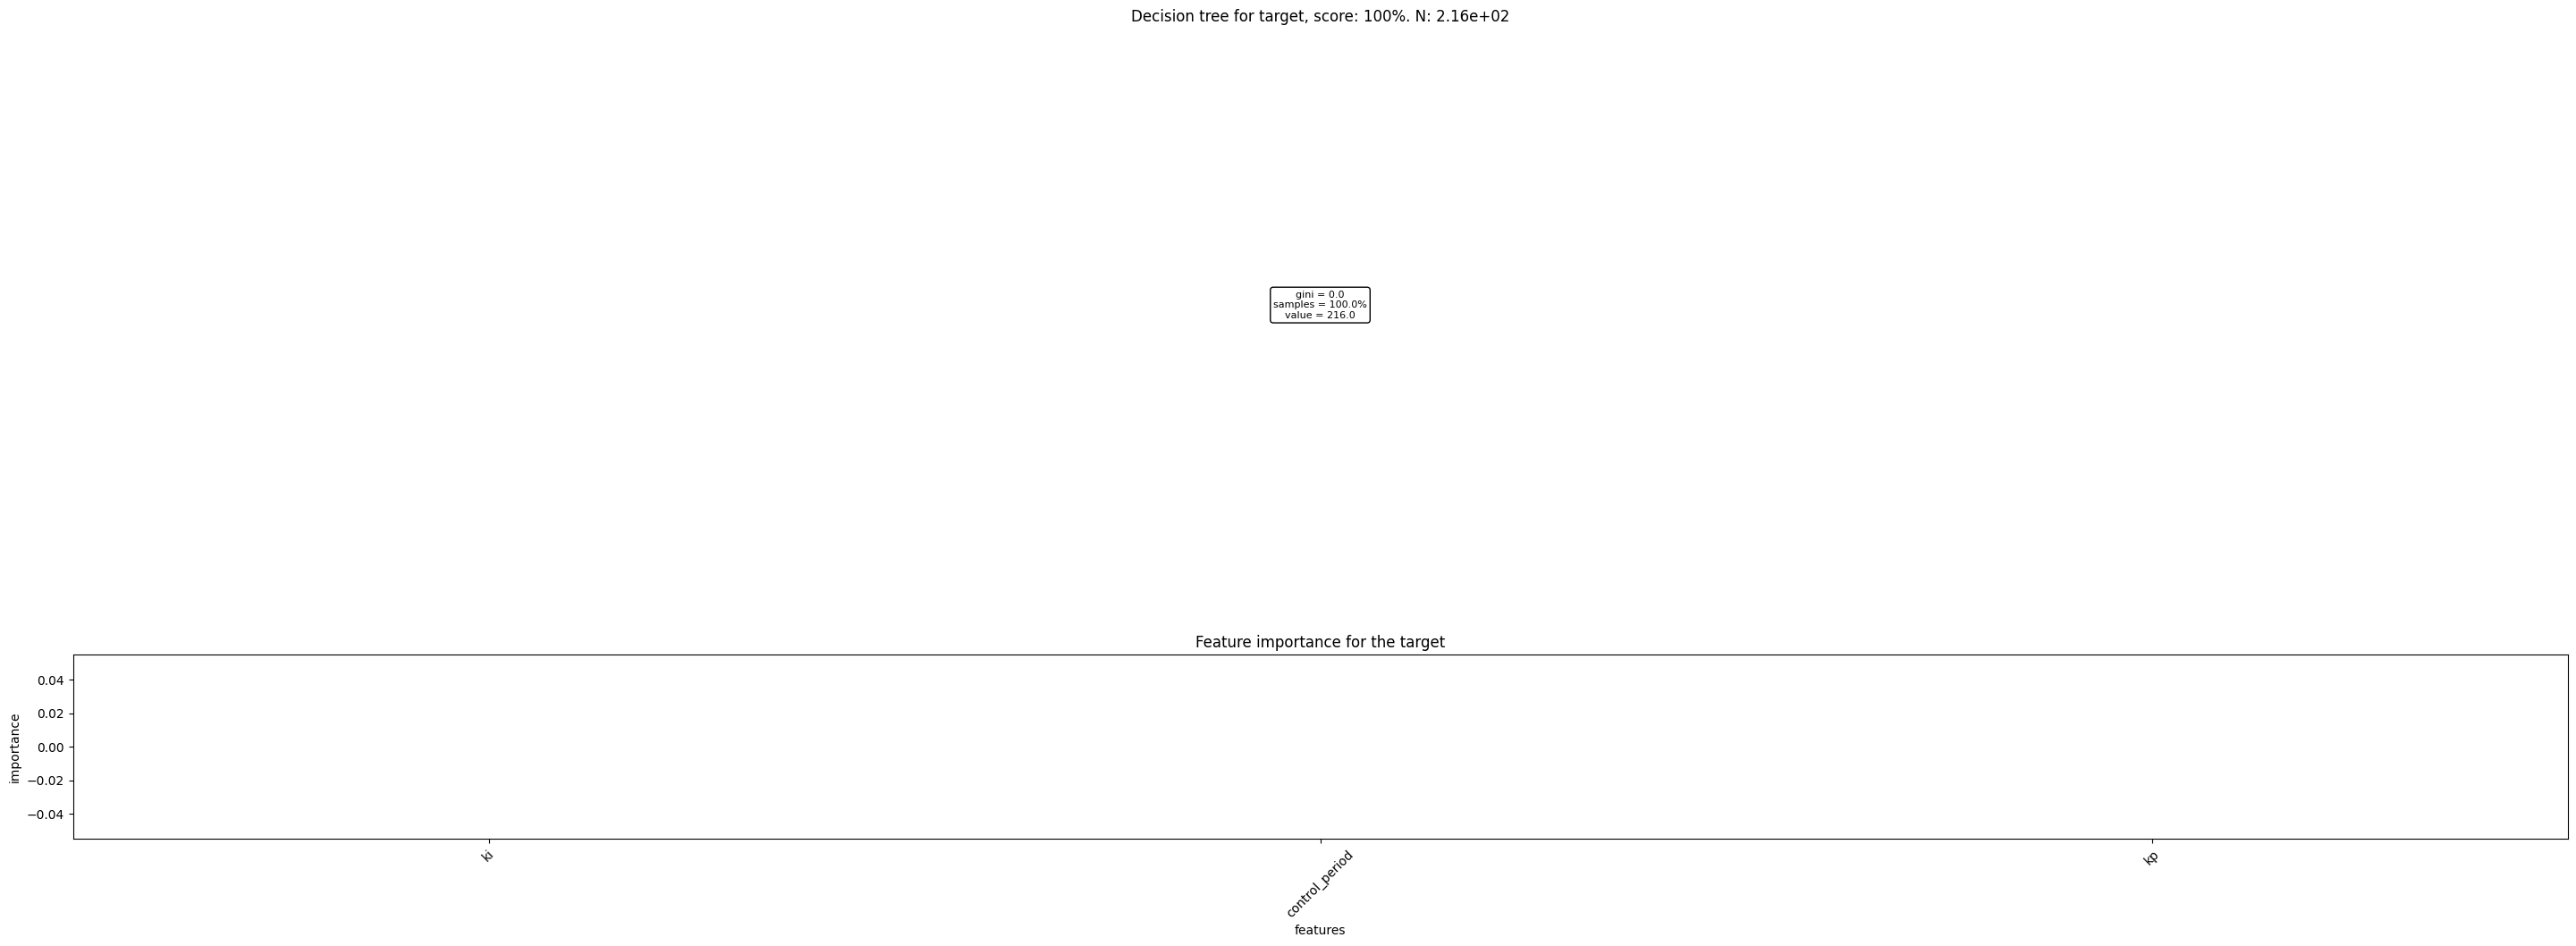

In [42]:
enabled = df_sensitivity.query(f'controller_enabled == True')
kpi_sensitivity_plot(enabled, goals['low_volatility'], control_params)

Plot is inclusive.

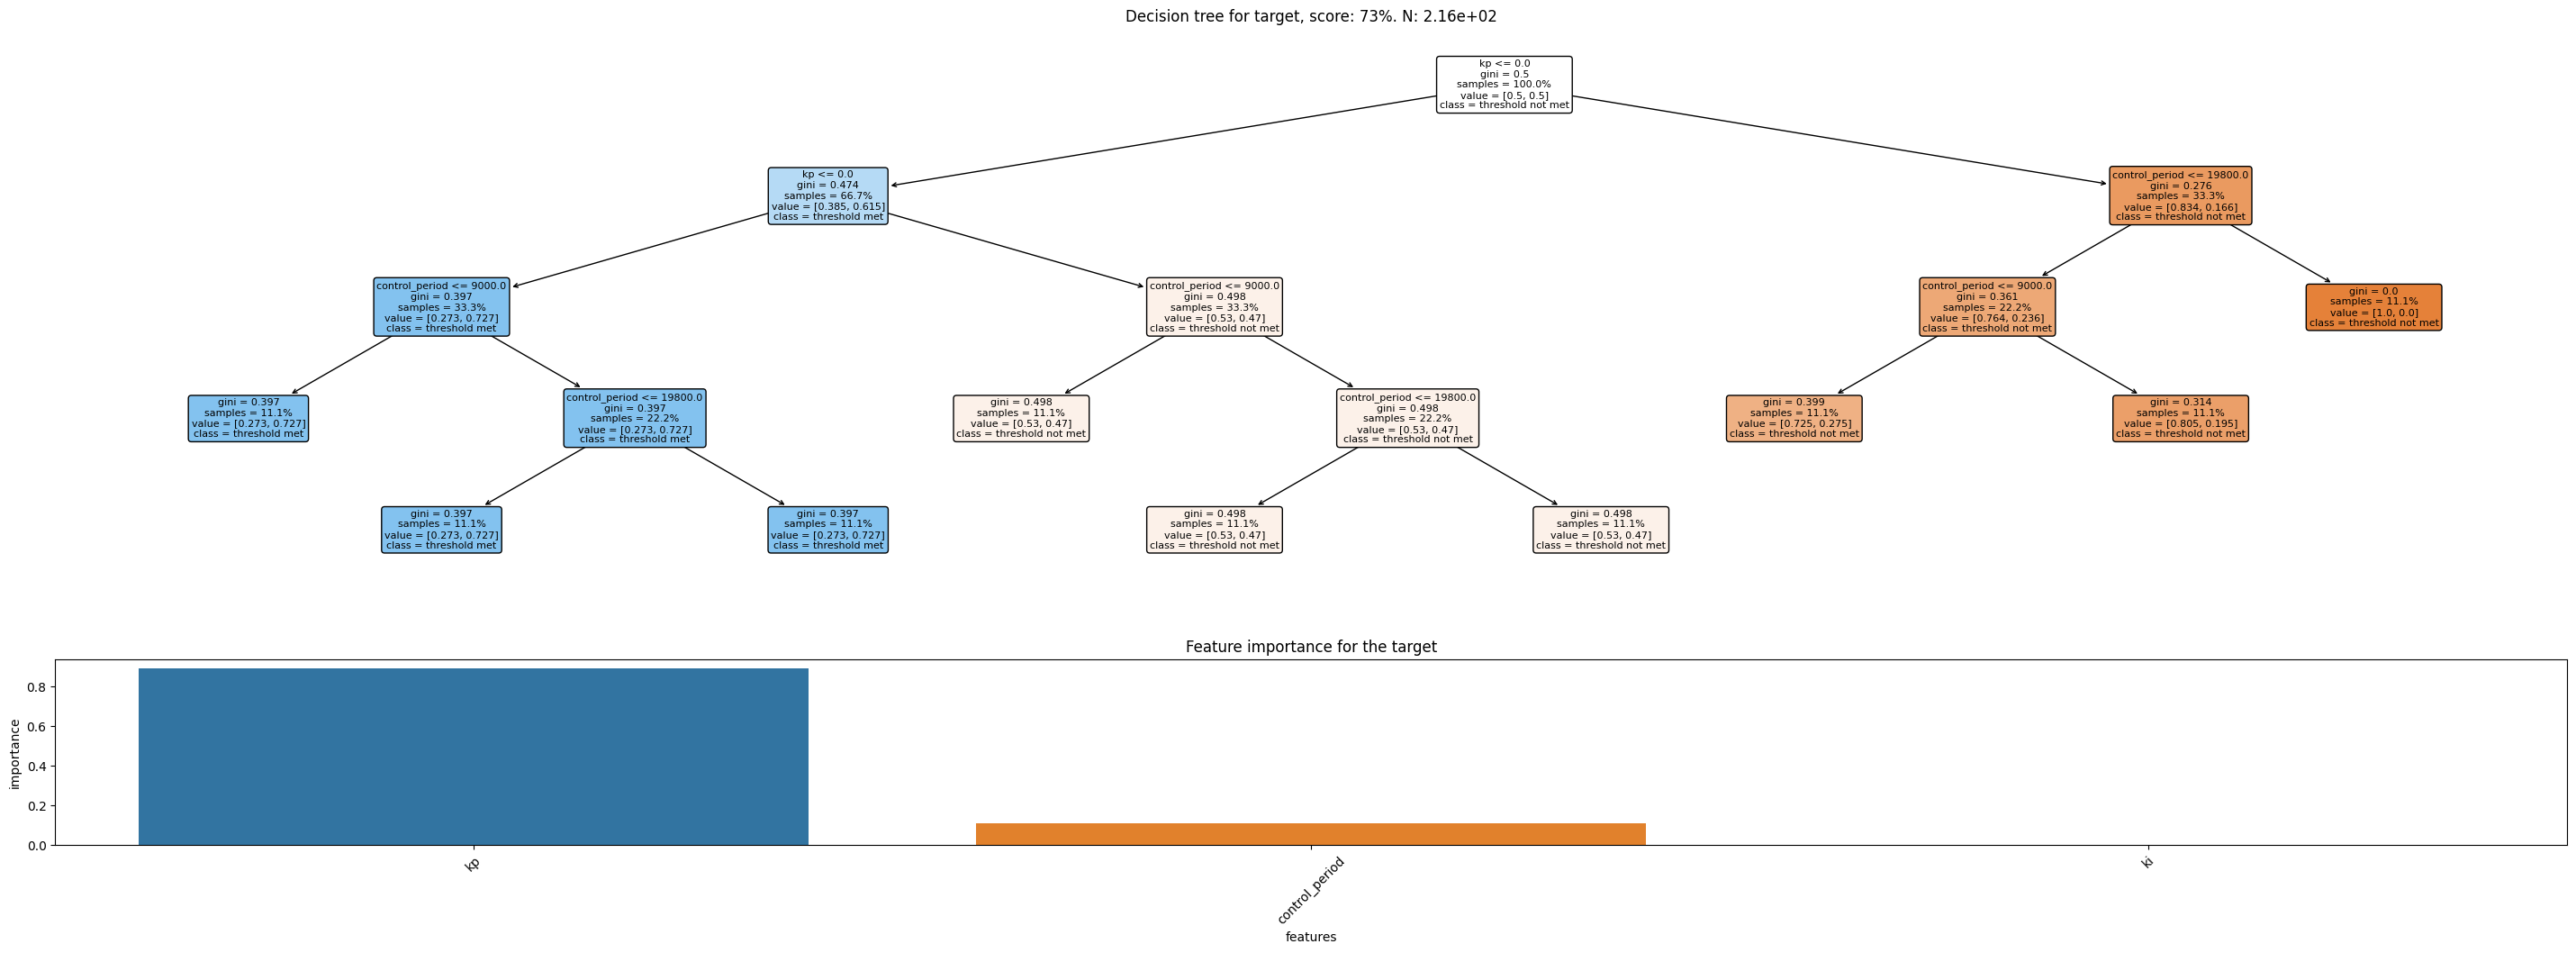

In [44]:
kpi_sensitivity_plot(enabled, goals['high_stability'], control_params)

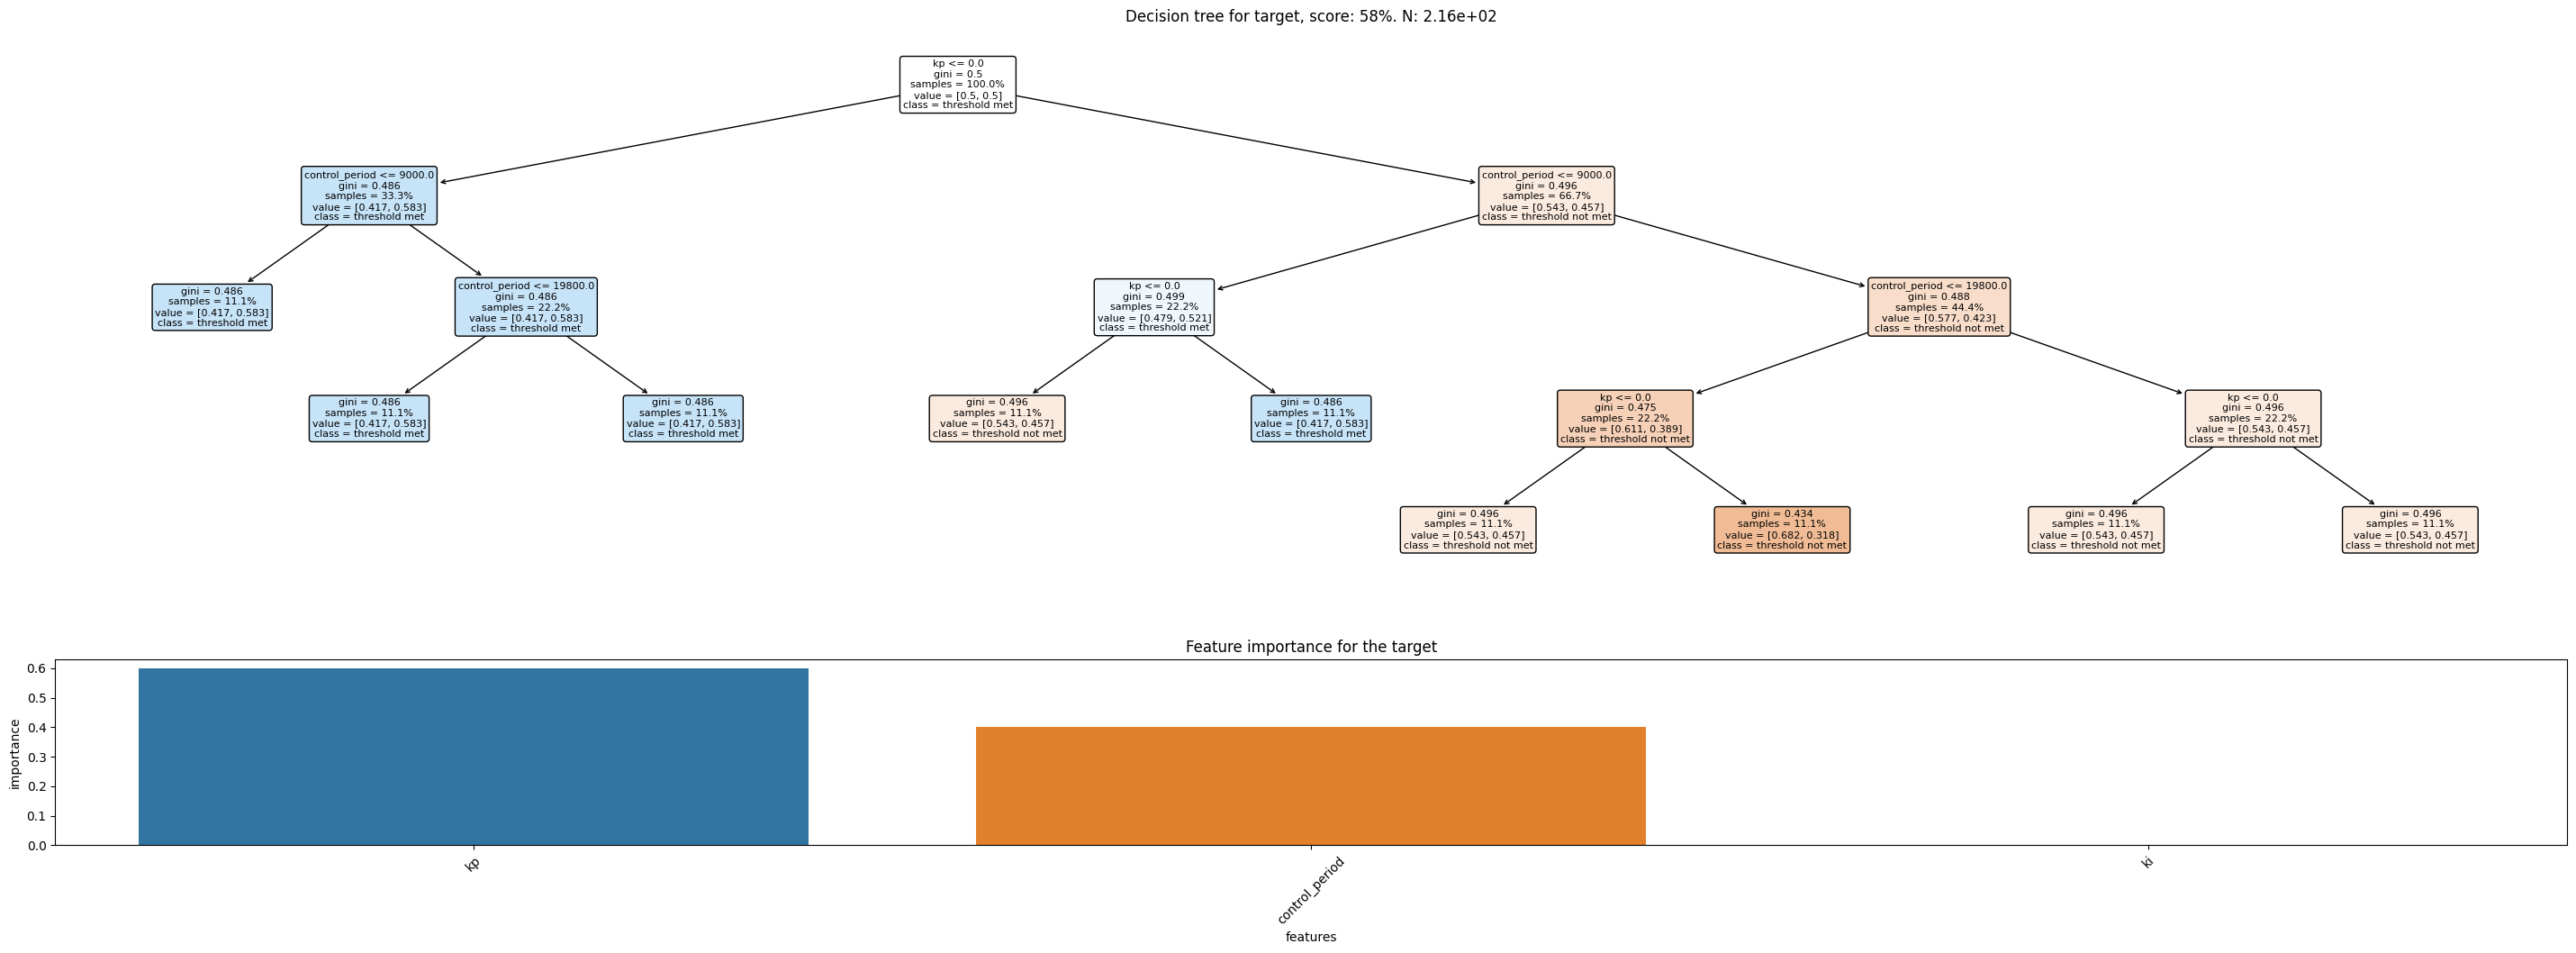

In [45]:
kpi_sensitivity_plot(enabled, goals['liquidity_threshold'], control_params)

#### Liquidity Demand Shock KPI Sensitivity  True

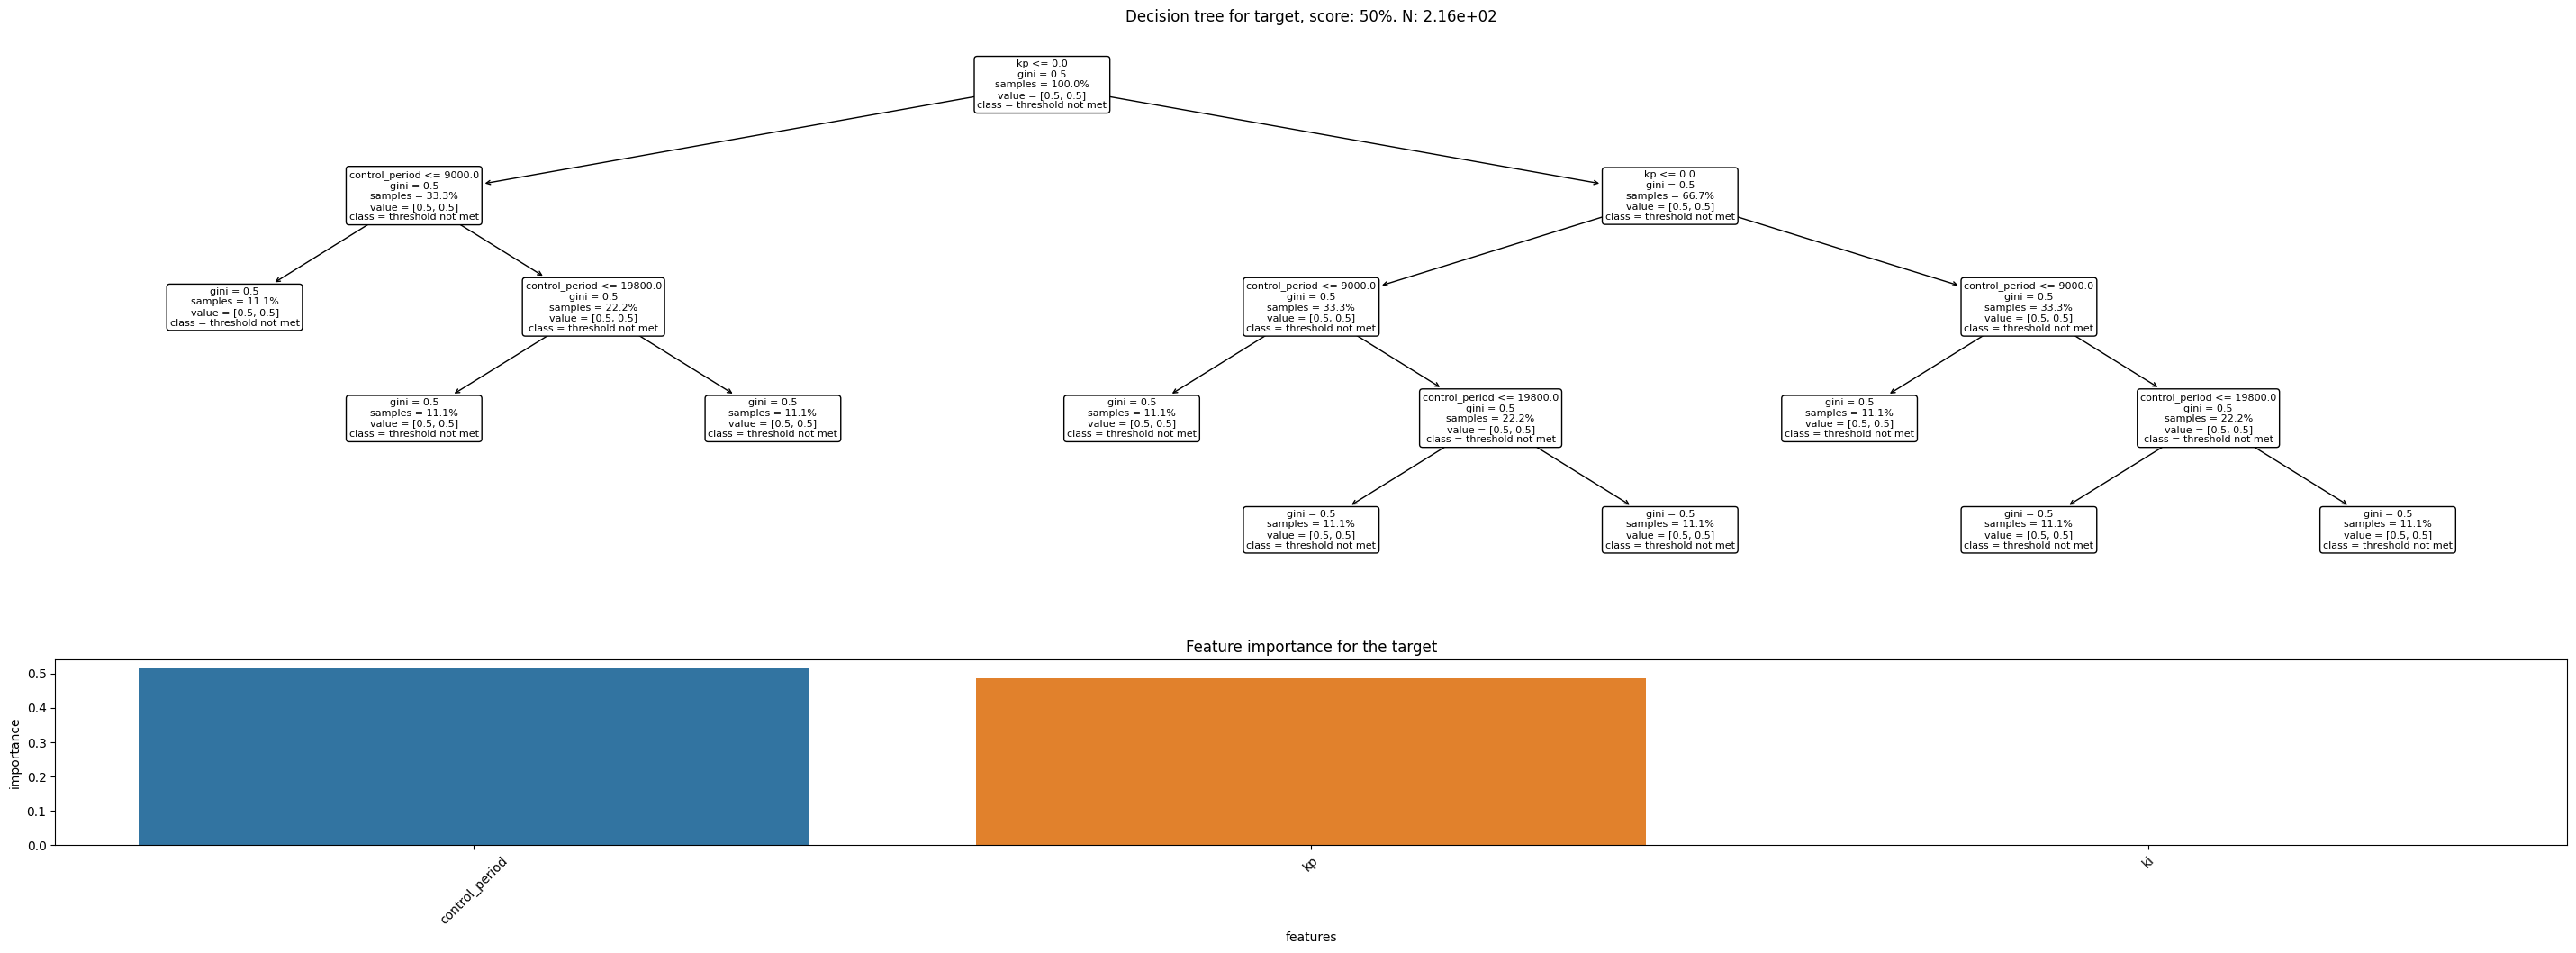

In [48]:
liquidity_demand_shock_true = df_sensitivity.query('liquidity_demand_shock == True')
liquidity_demand_shock_false = df_sensitivity.query('liquidity_demand_shock == False')
kpi_sensitivity_plot(liquidity_demand_shock_true, goals['low_volatility'], control_params)


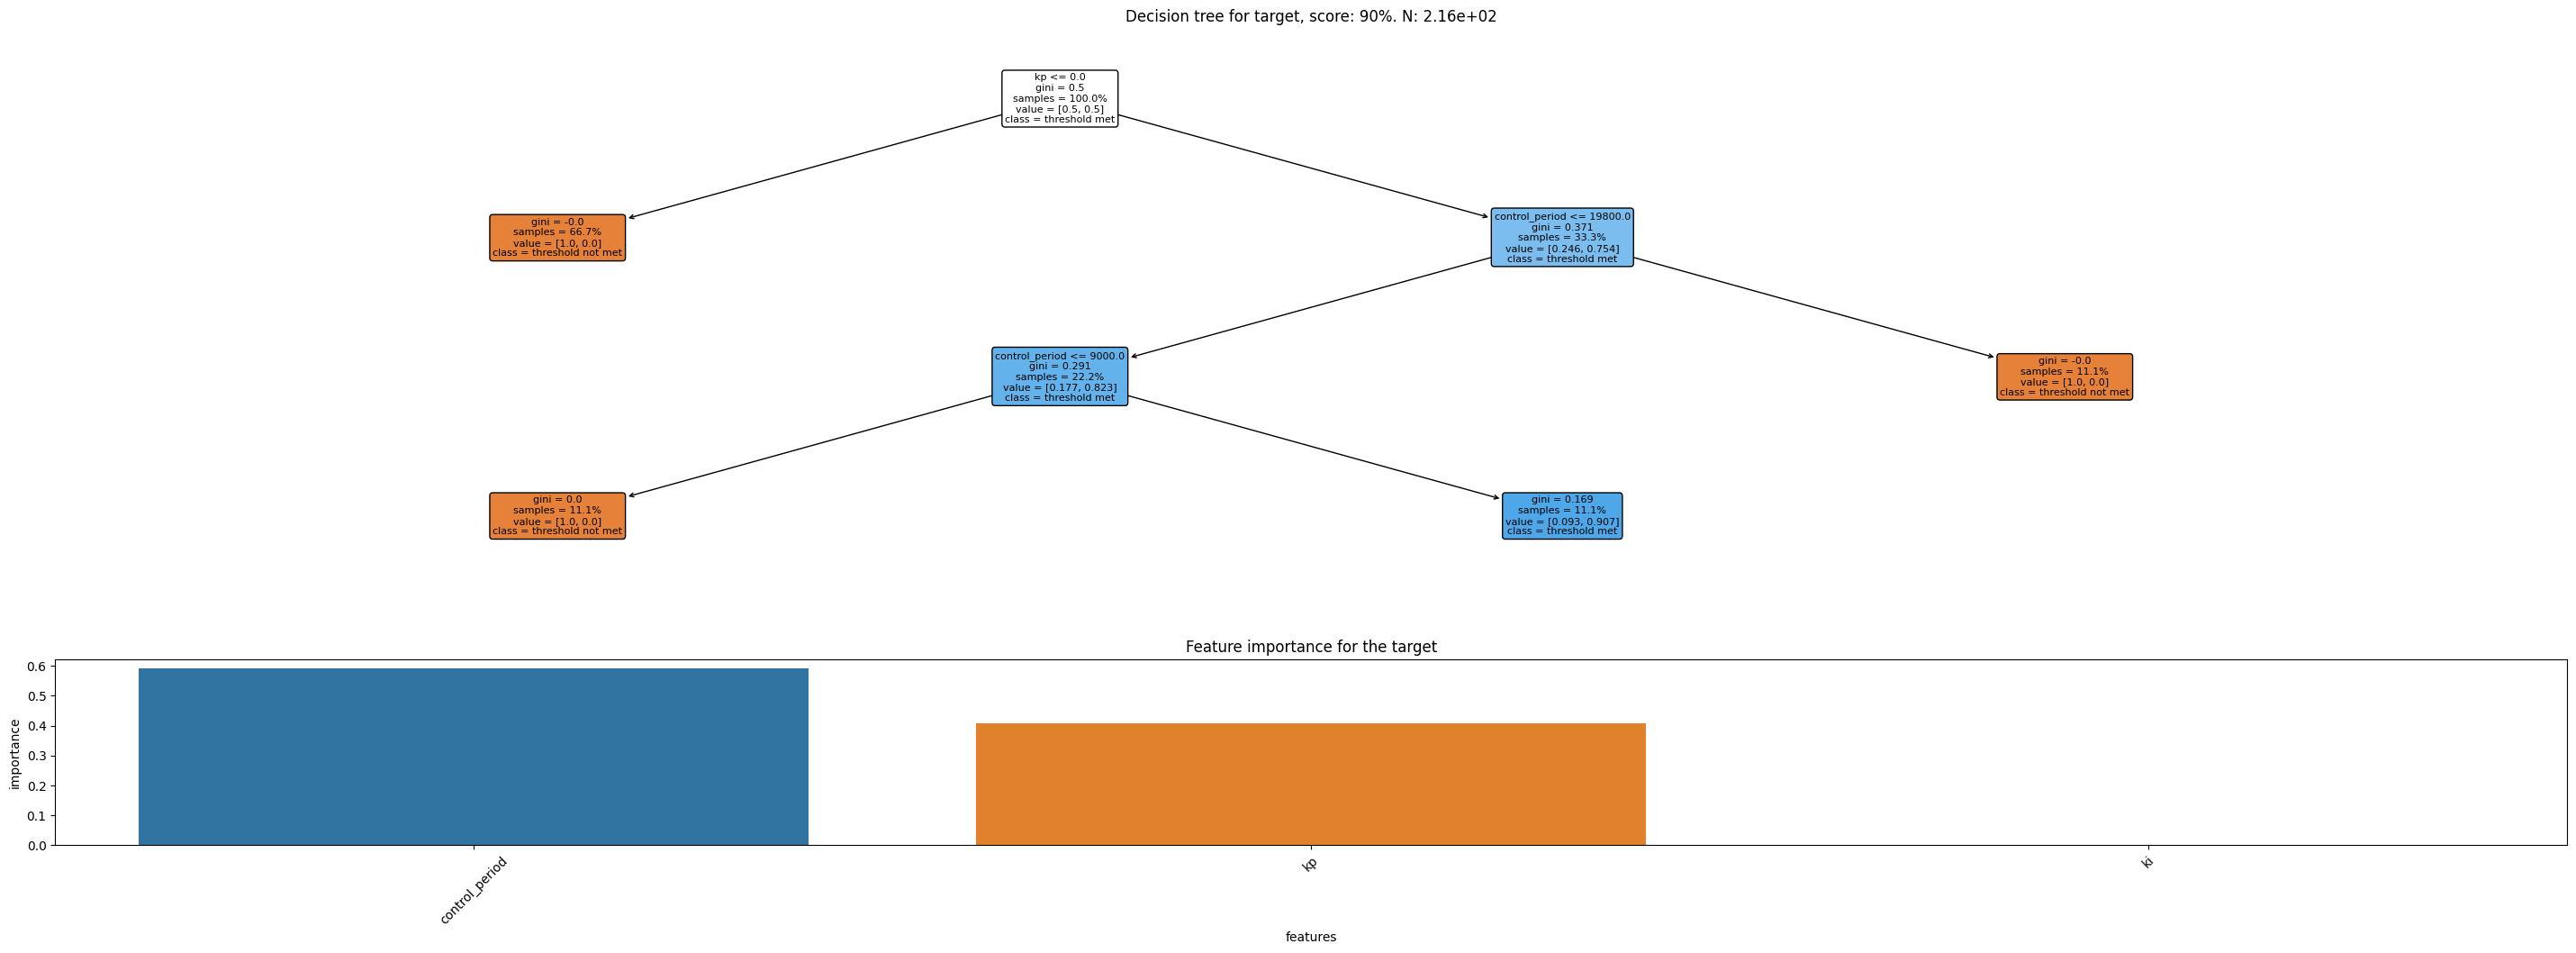

In [49]:
kpi_sensitivity_plot(liquidity_demand_shock_true, goals['high_stability'], control_params)

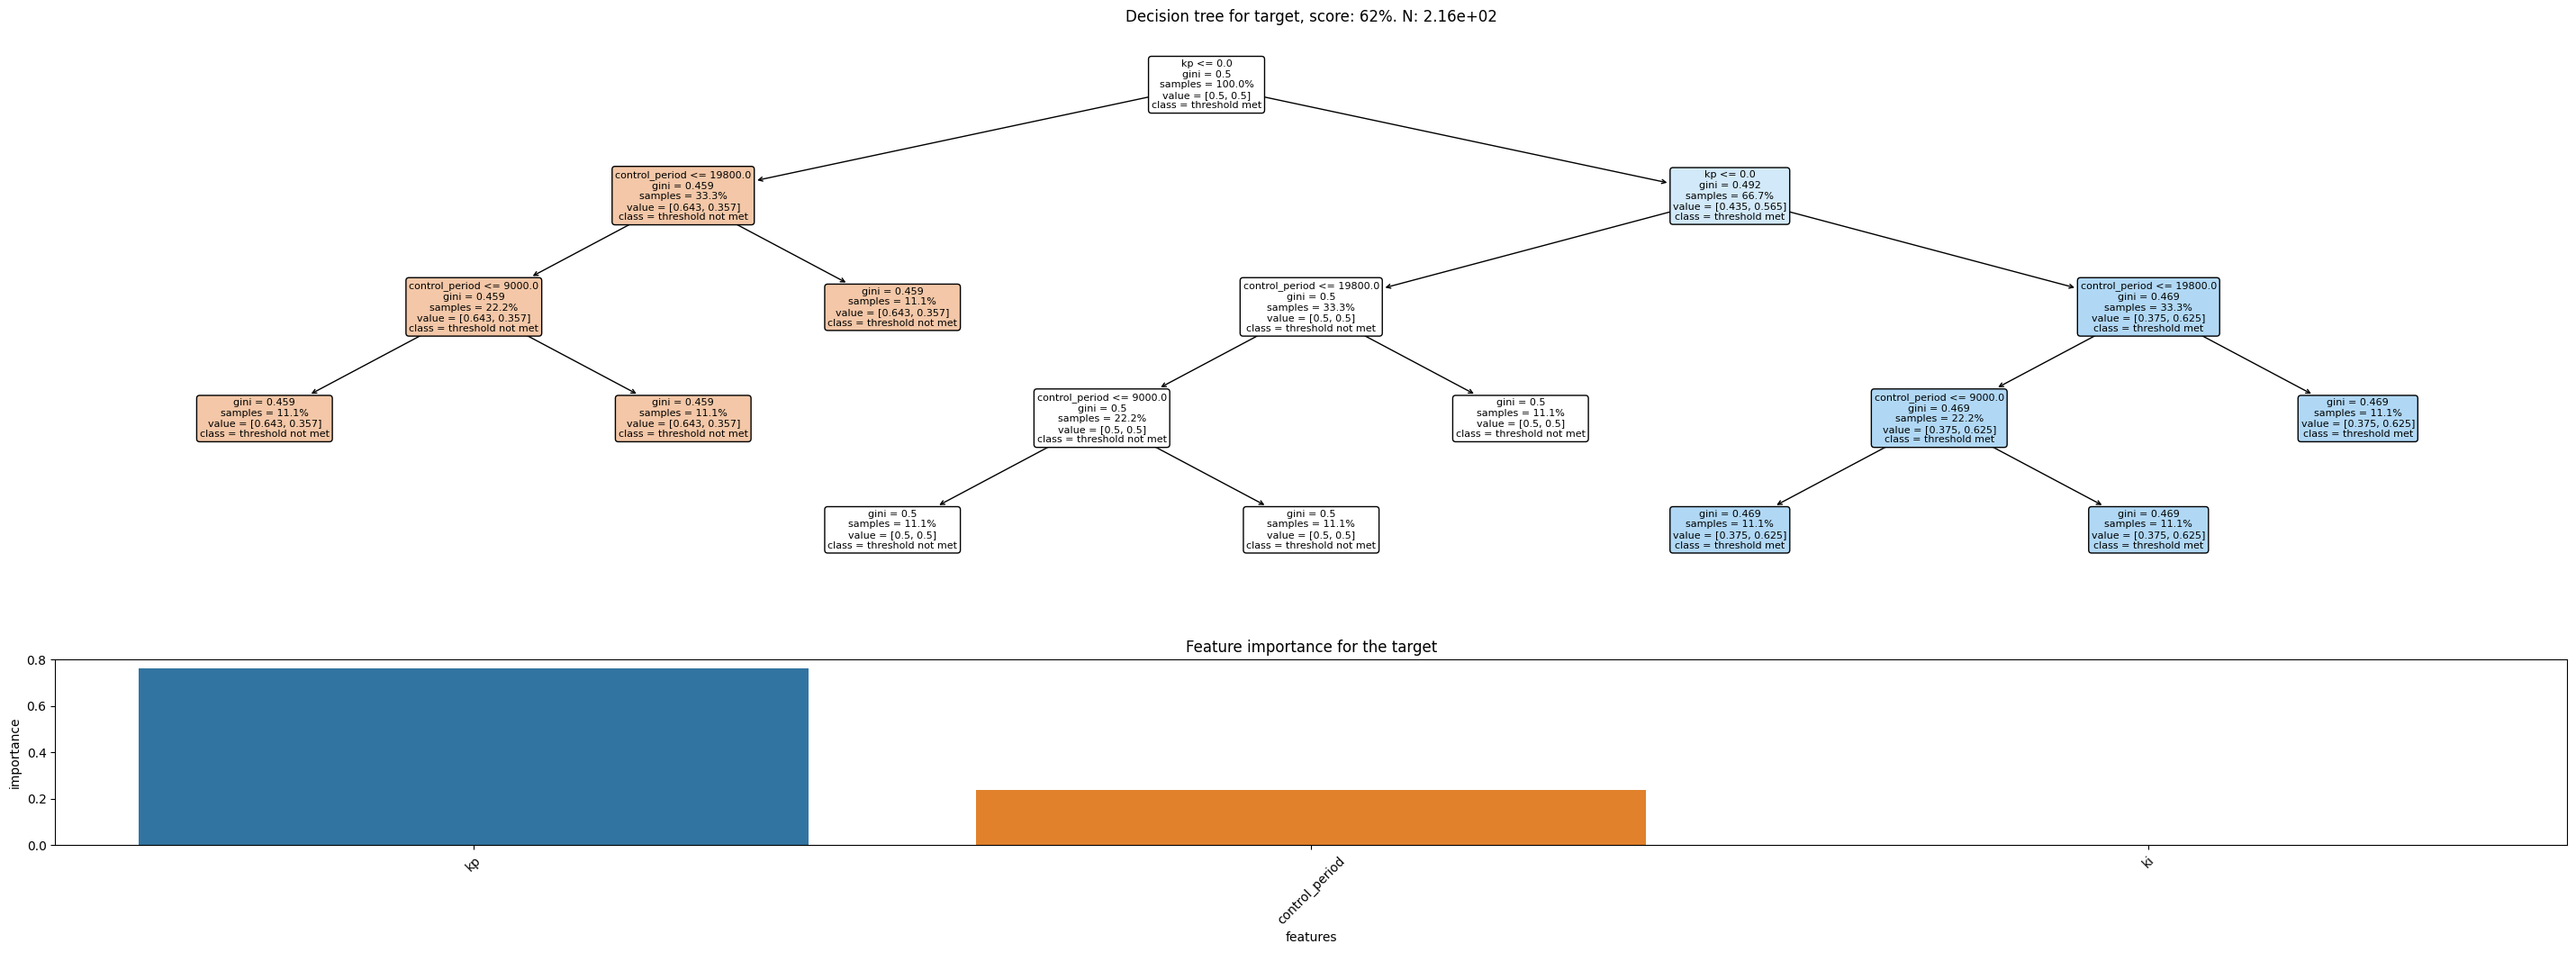

In [50]:
kpi_sensitivity_plot(liquidity_demand_shock_true, goals['liquidity_threshold'], control_params)

#### Liquidity Demand Shock KPI Sensitivity - False

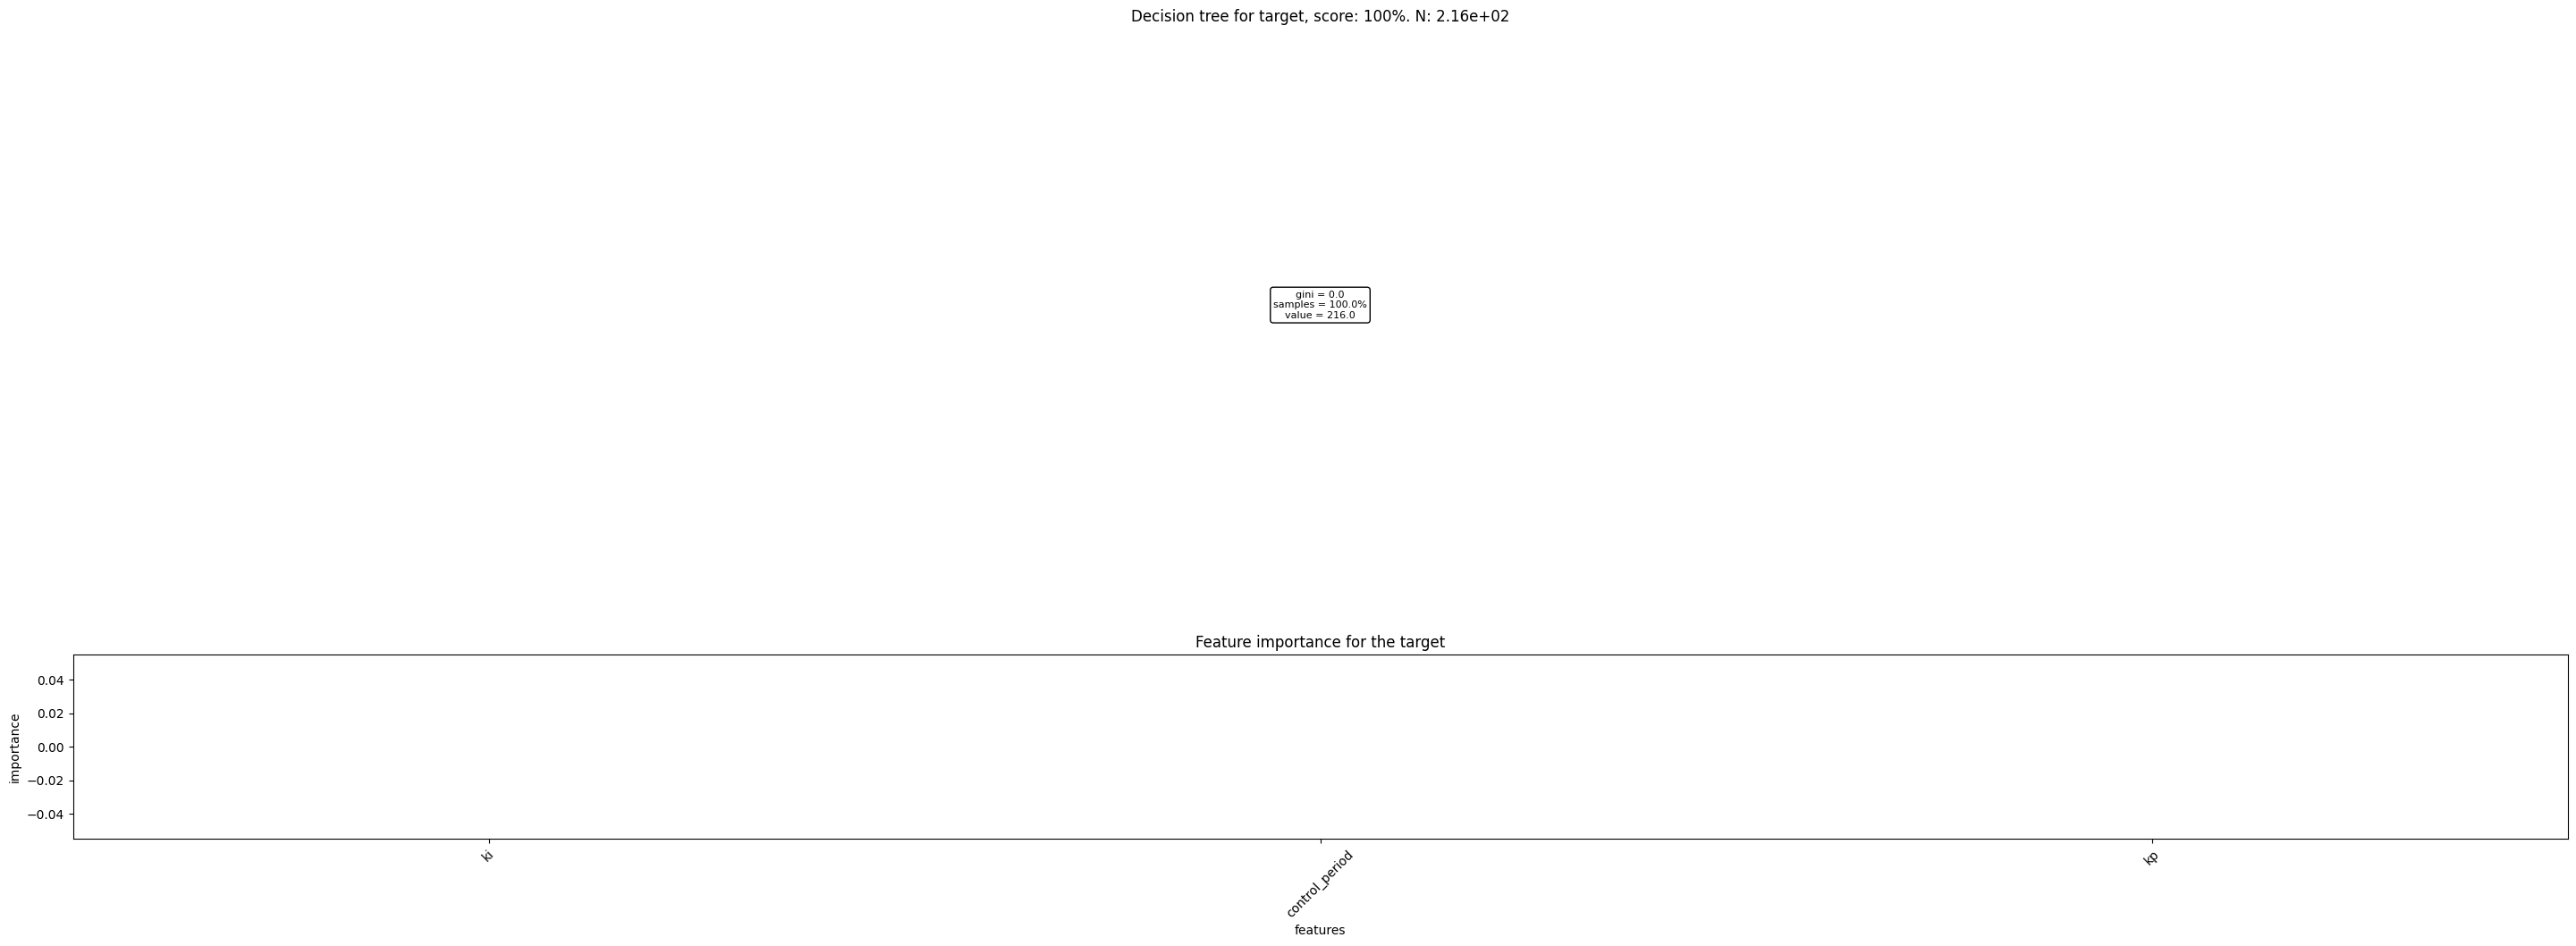

In [51]:
kpi_sensitivity_plot(liquidity_demand_shock_false, goals['low_volatility'], control_params)


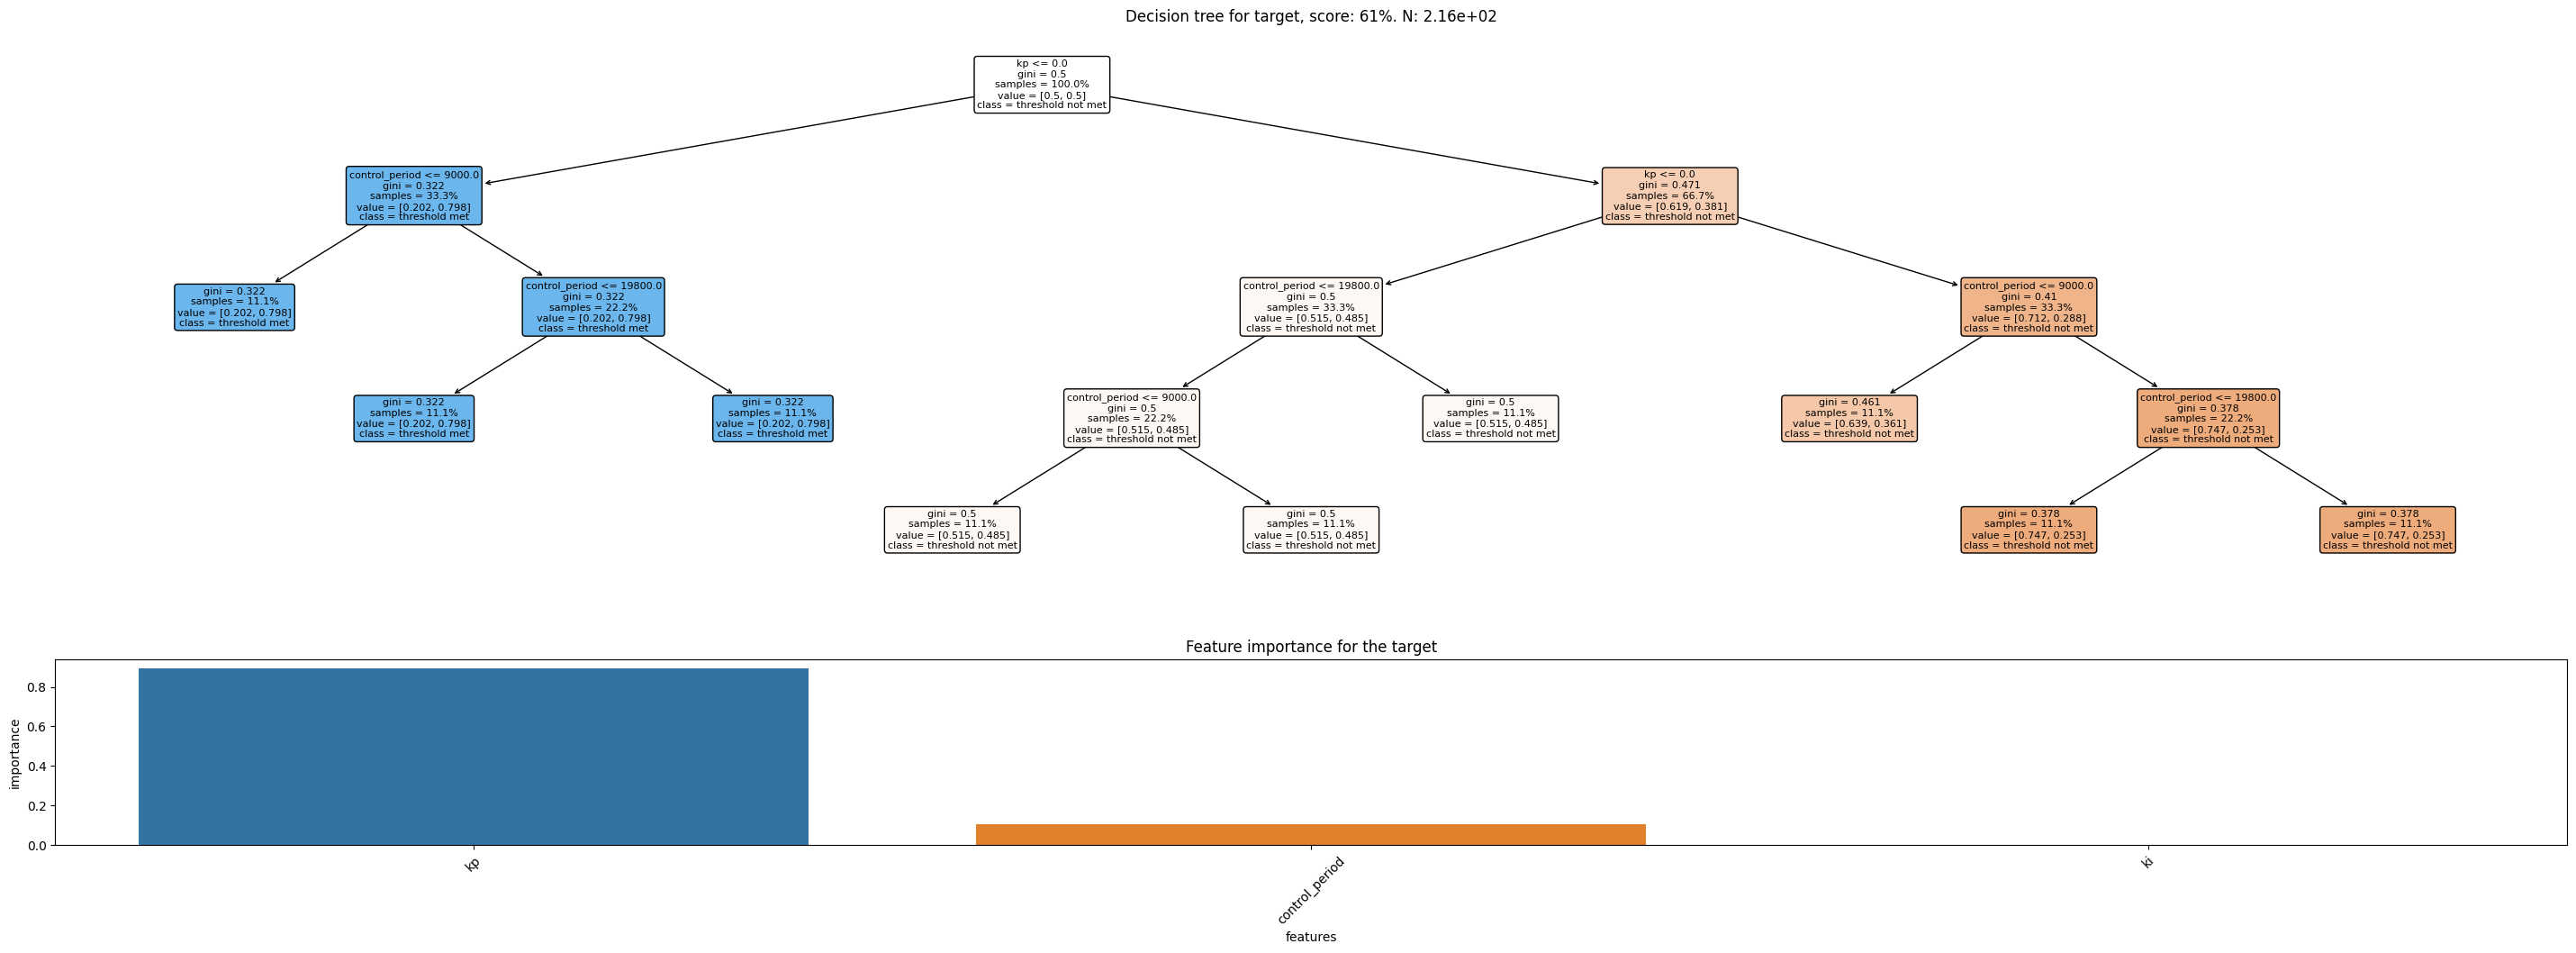

In [52]:
kpi_sensitivity_plot(liquidity_demand_shock_false, goals['high_stability'], control_params)

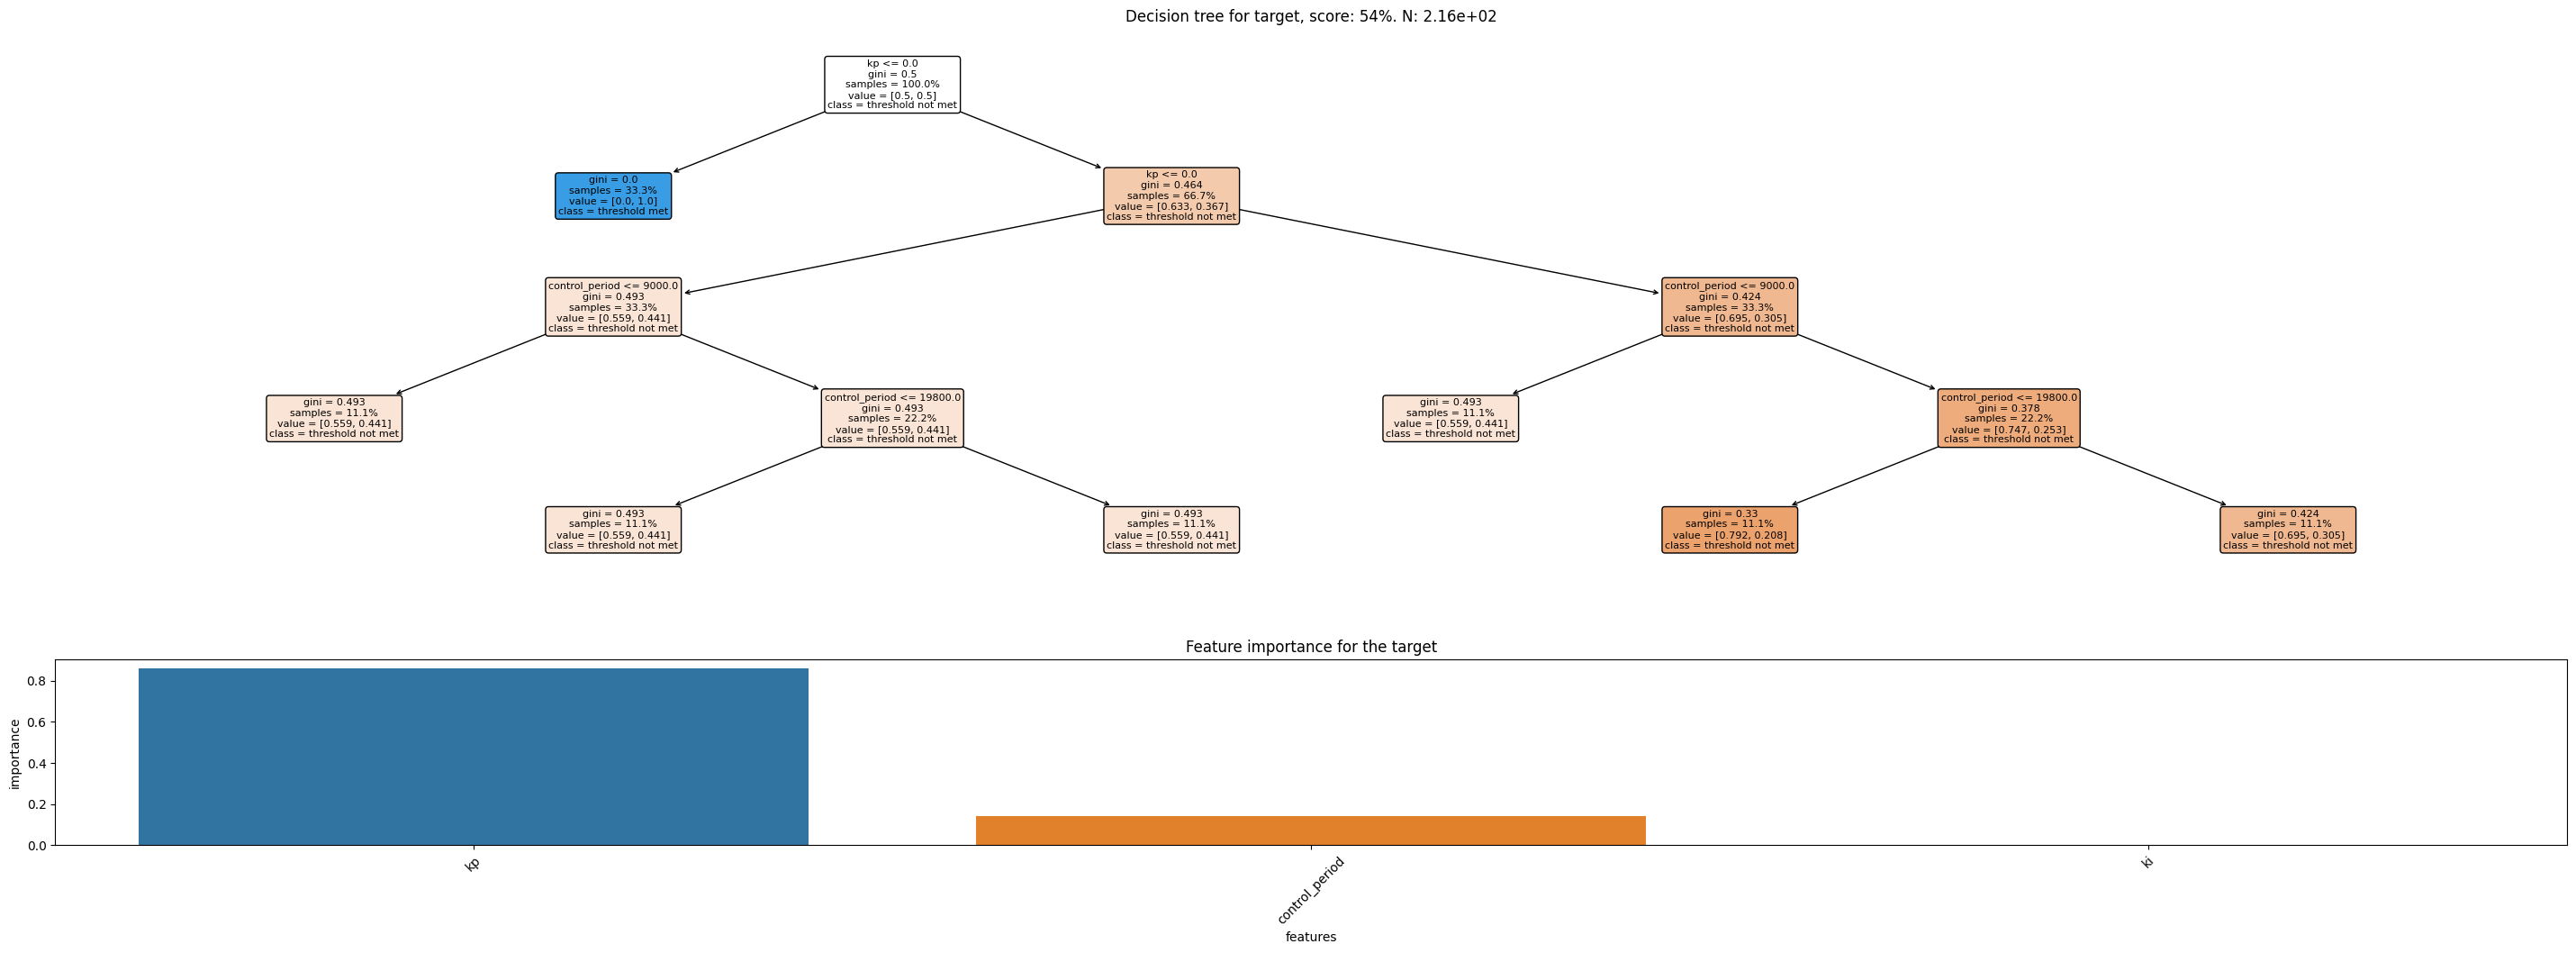

In [53]:
kpi_sensitivity_plot(liquidity_demand_shock_false, goals['liquidity_threshold'], control_params)

#### Liquidity Demand Shock KPI Sensitivity - True

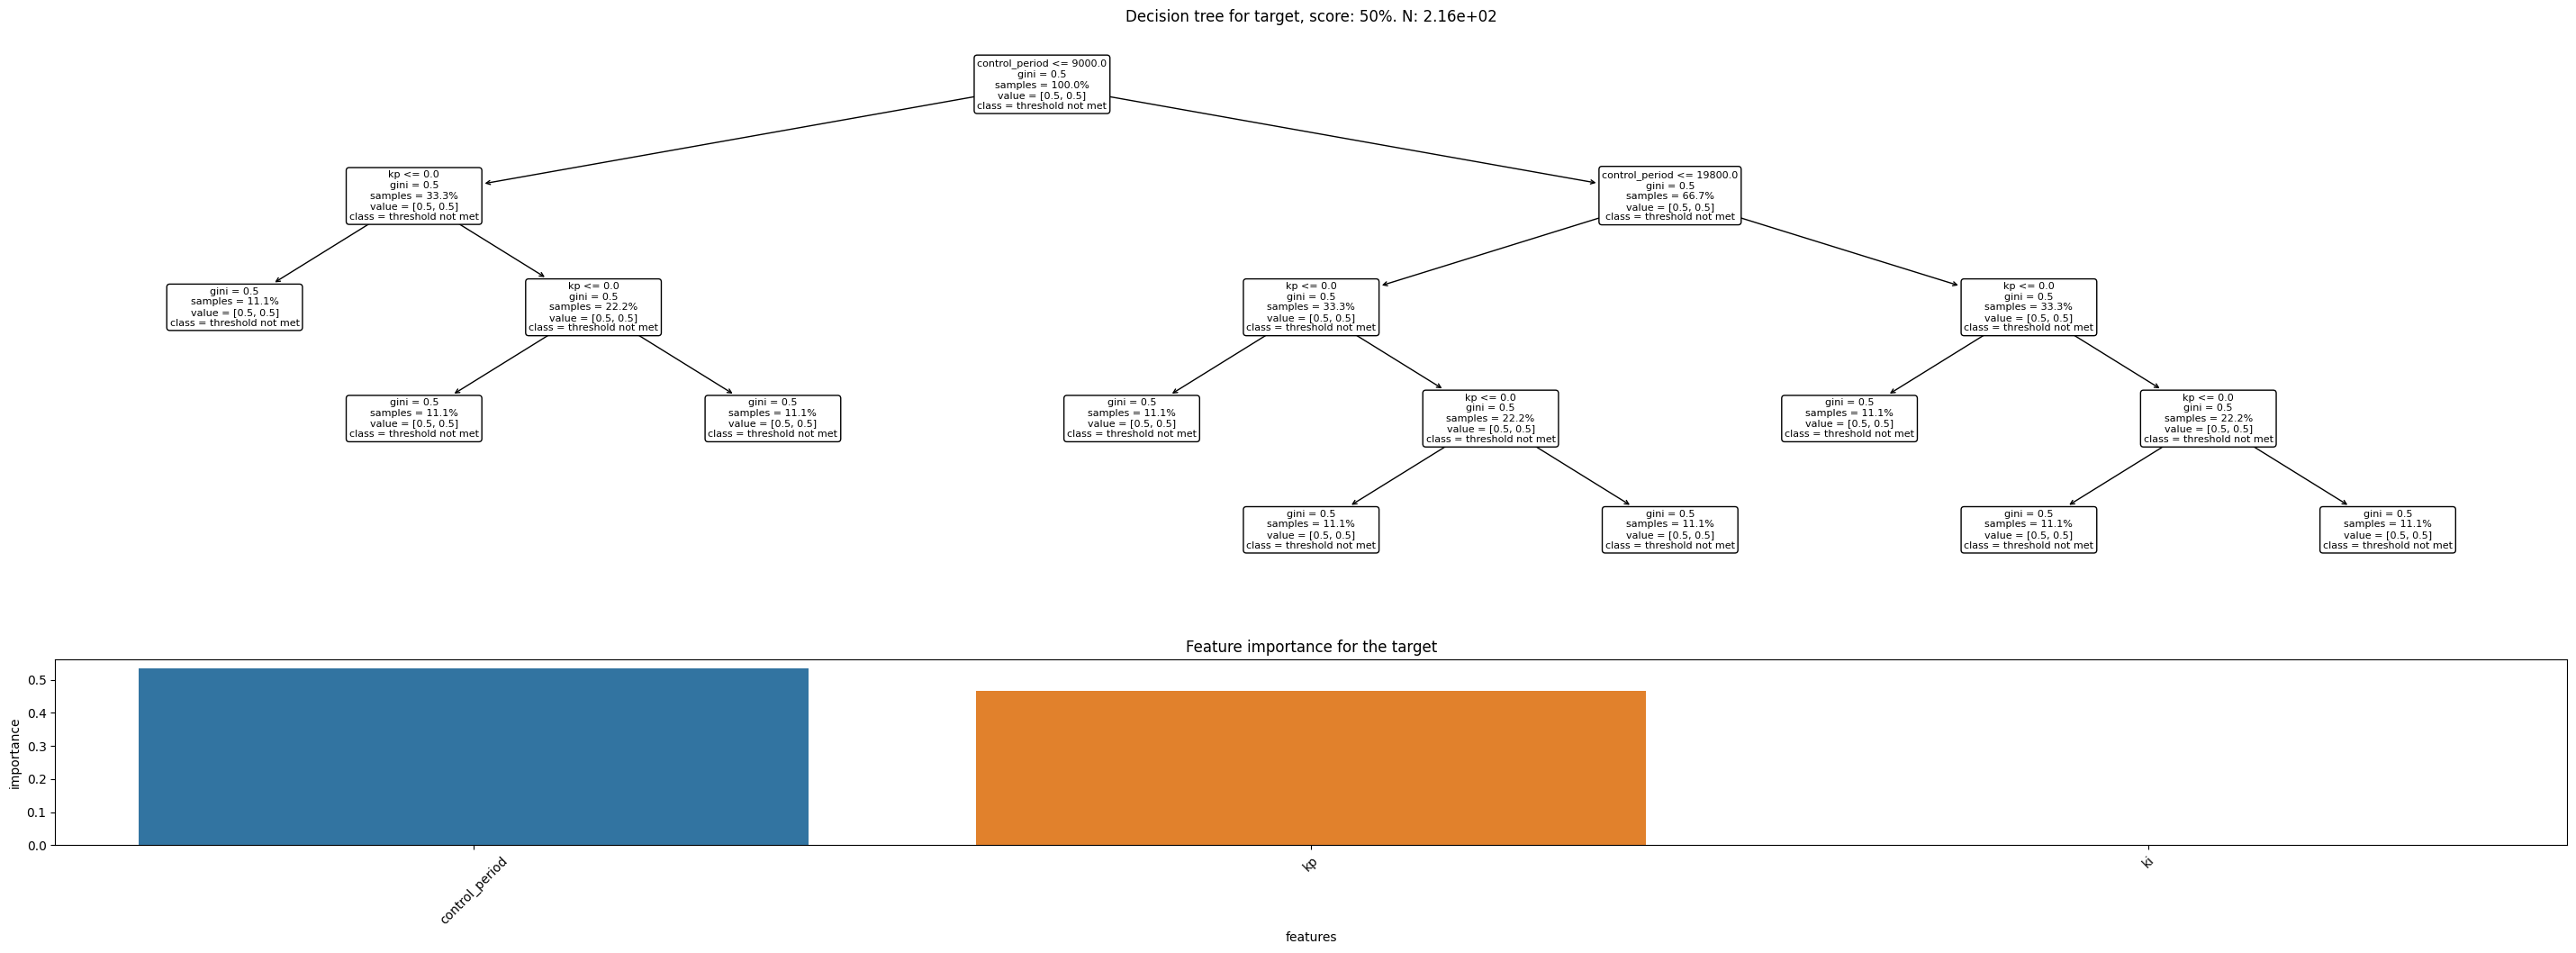

In [55]:
kpi_sensitivity_plot(liquidity_demand_shock_true, goals['low_volatility'], control_params)


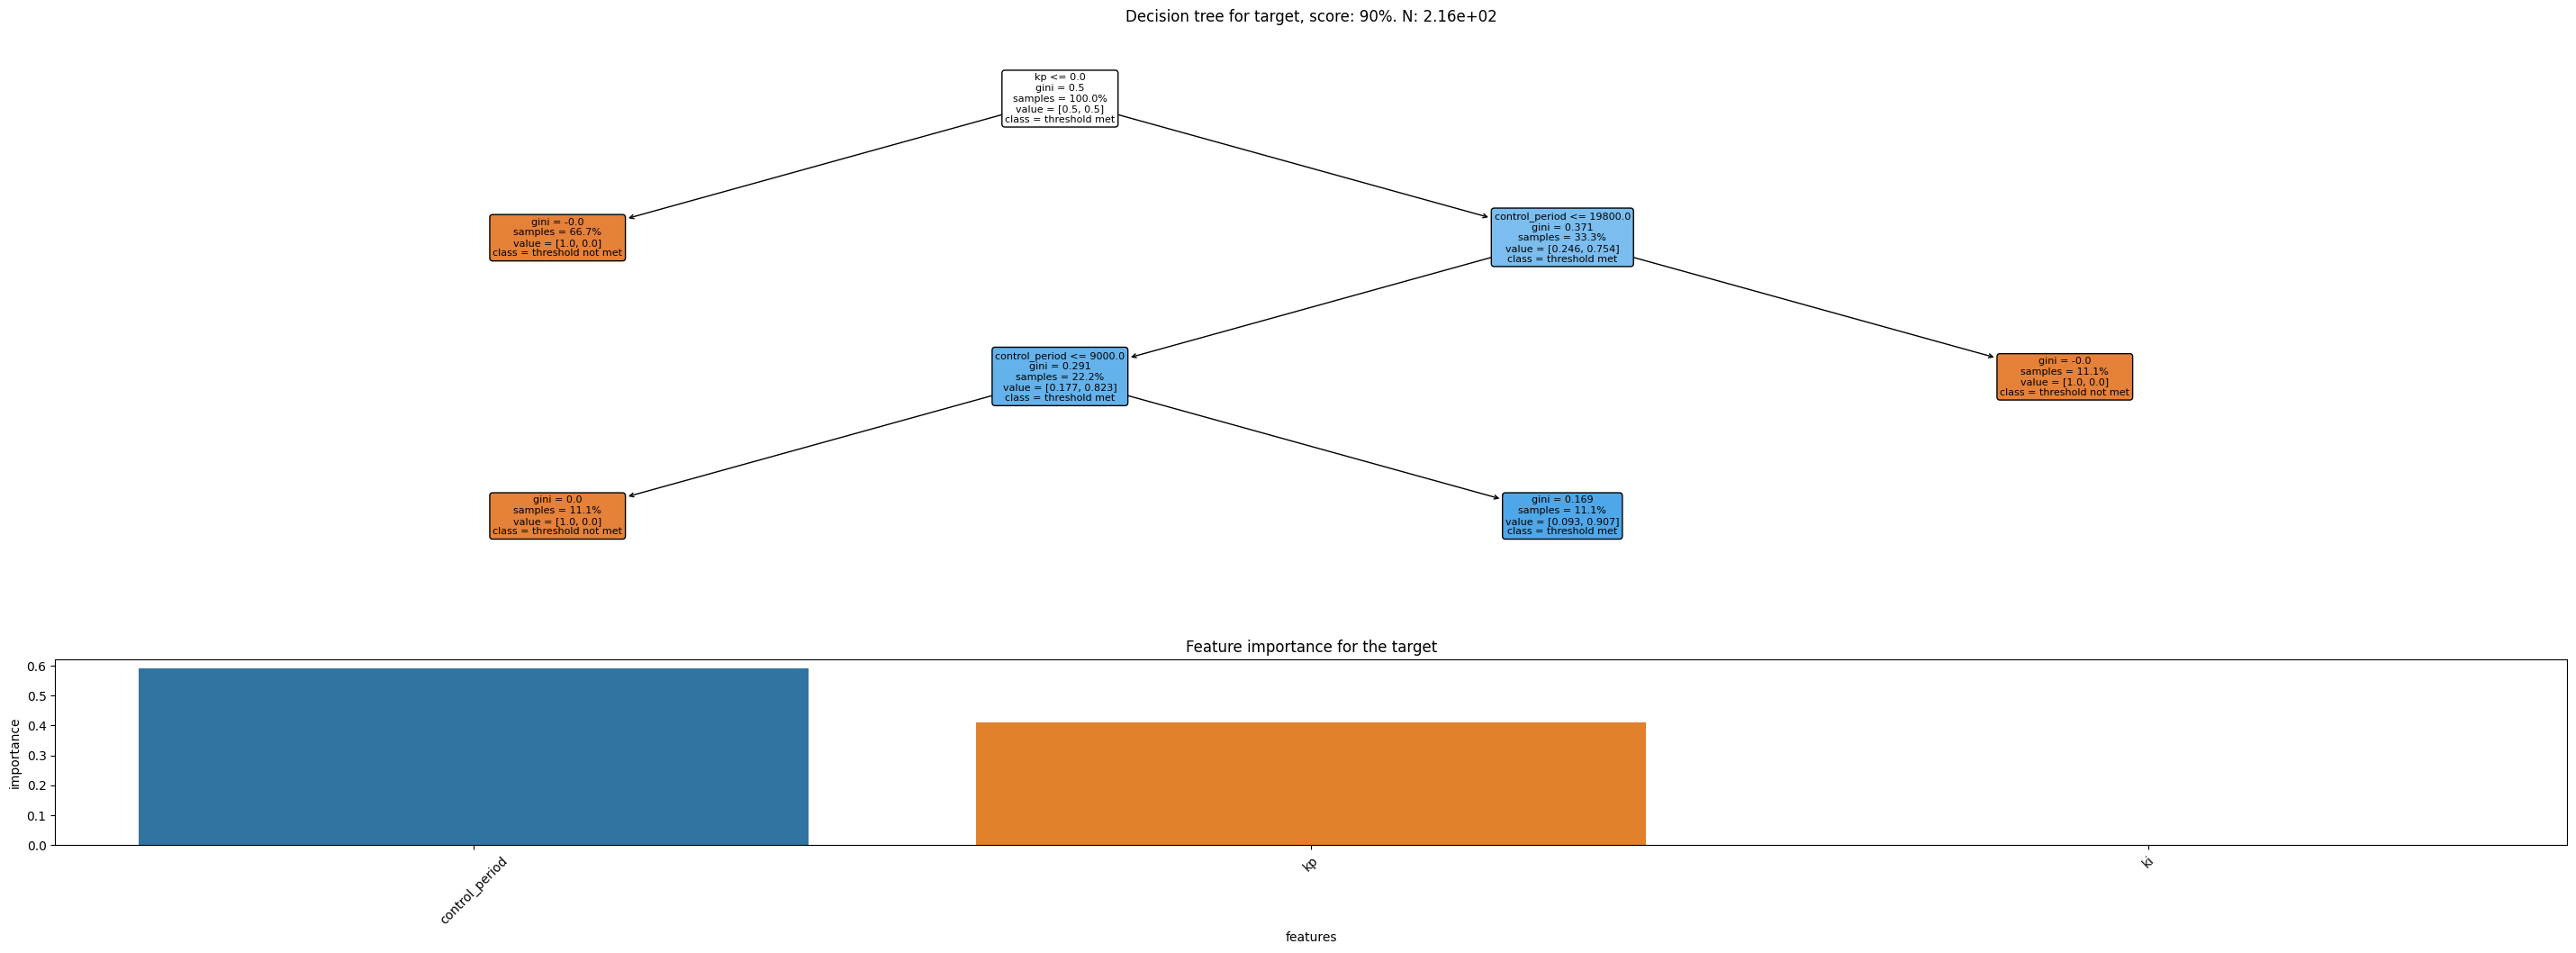

In [56]:
kpi_sensitivity_plot(liquidity_demand_shock_true, goals['high_stability'], control_params)

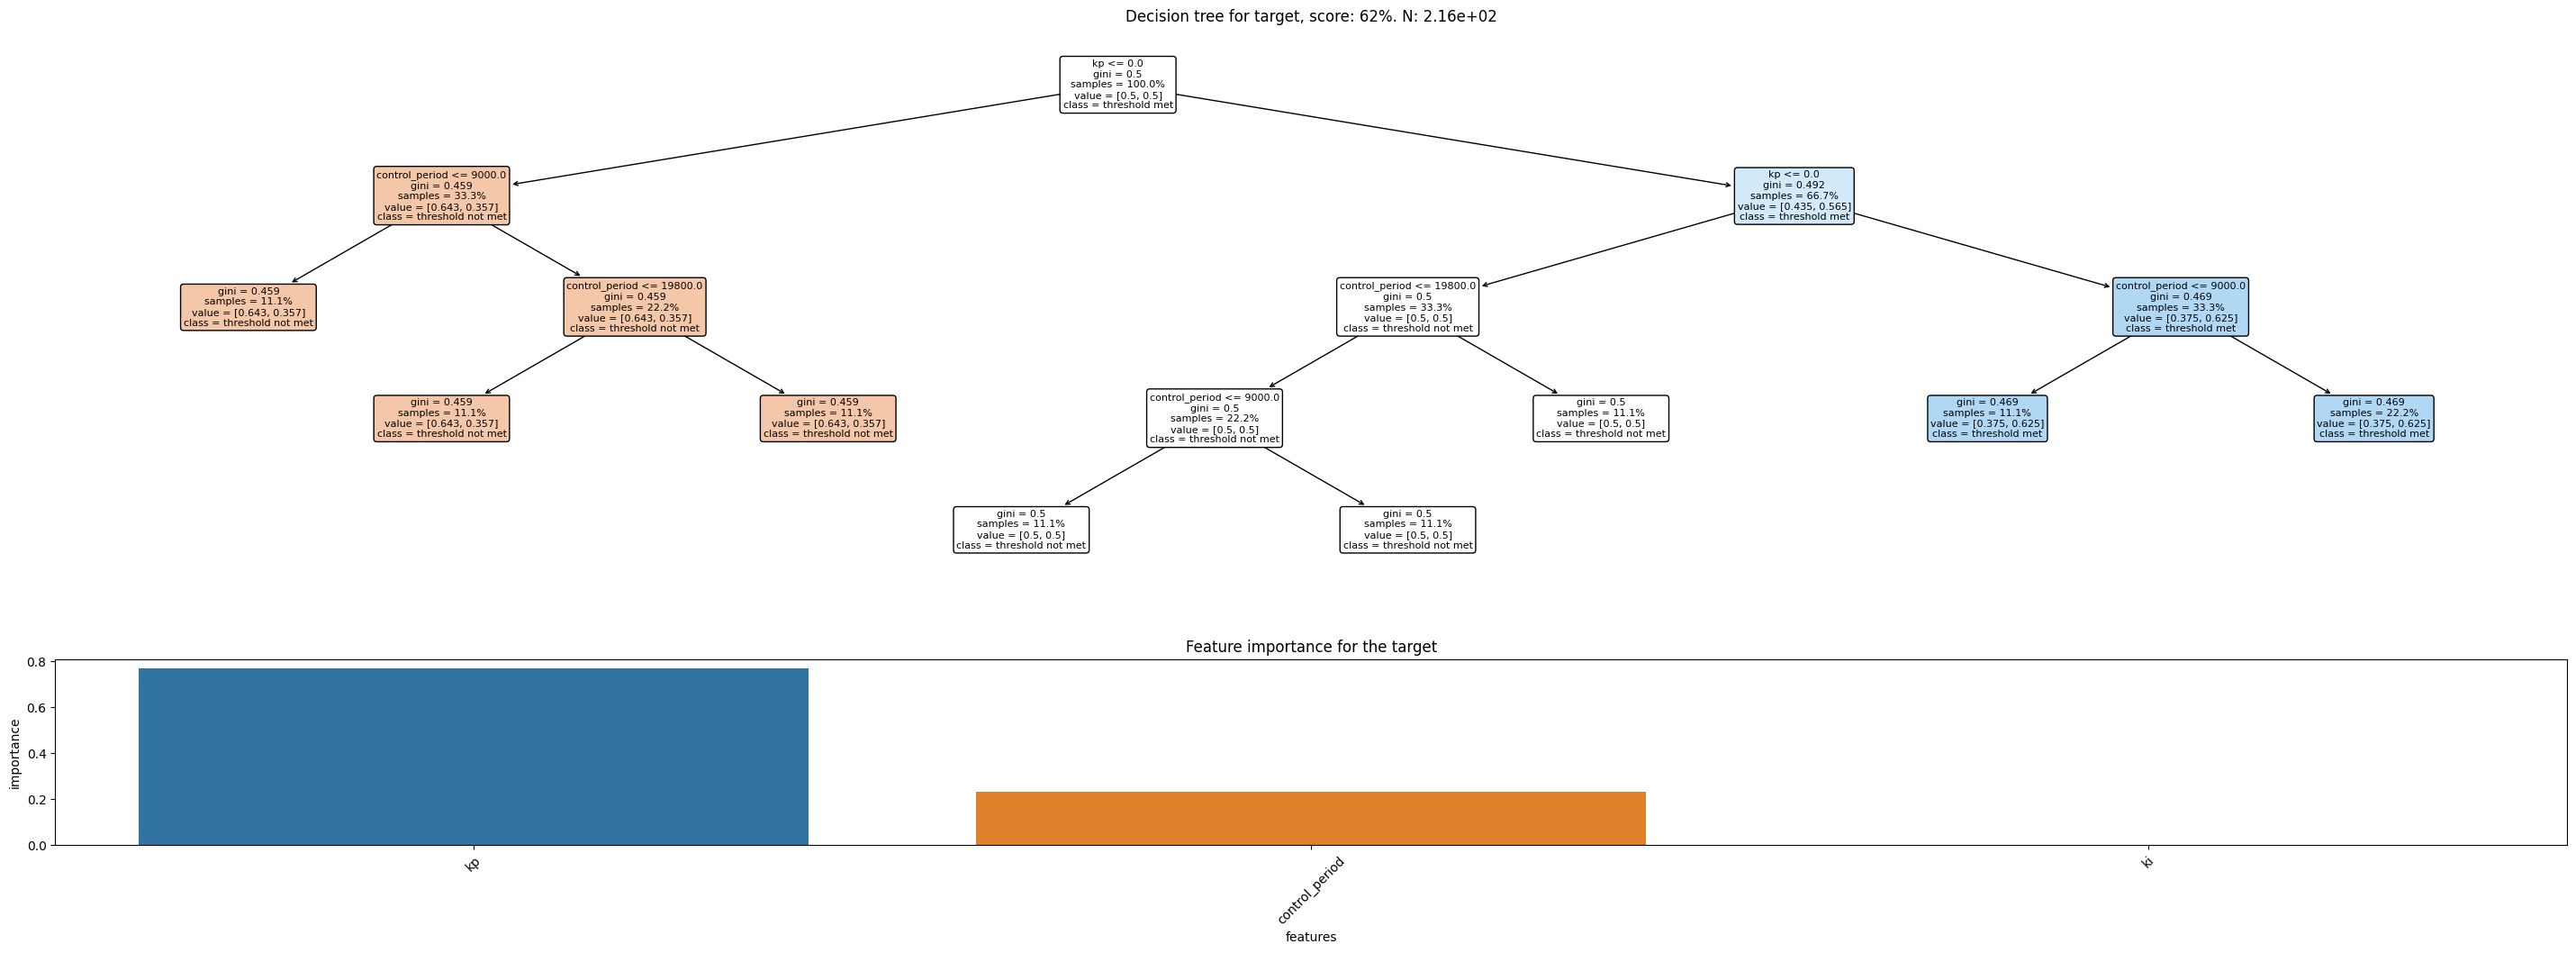

In [57]:
kpi_sensitivity_plot(liquidity_demand_shock_true, goals['liquidity_threshold'], control_params)

## Conclusion